In [1]:
from thesispy.elastix_wrapper.runner import run
from thesispy.elastix_wrapper.parameters import Parameters, Collection
from thesispy.experiments.validation import plot_deformed_mesh, plot_dvf_masked, jacobian_determinant
from pathlib import Path

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = (
    Parameters.from_base(mesh_size=12, metric="AdvancedNormalizedCorrelation", seed=1, use_mask=True)
    .asgd()
    .multi_resolution(1, r_sched=[3])
    .stopping_criteria(100)
    .instance(Collection.LEARN, 1)
)
result = run(params, Path("../output/" + str(params)), suppress_stdout=True, visualize=False, validate=False)

2023-03-10 00:34:59,452 - Runner - INFO - Running elastix in: ../output/1678404899_learn_1_adaptivestochasticgradientdescent_451509
2023-03-10 00:35:02,939 - Runner - INFO - Run ended. It took 3.4874 seconds


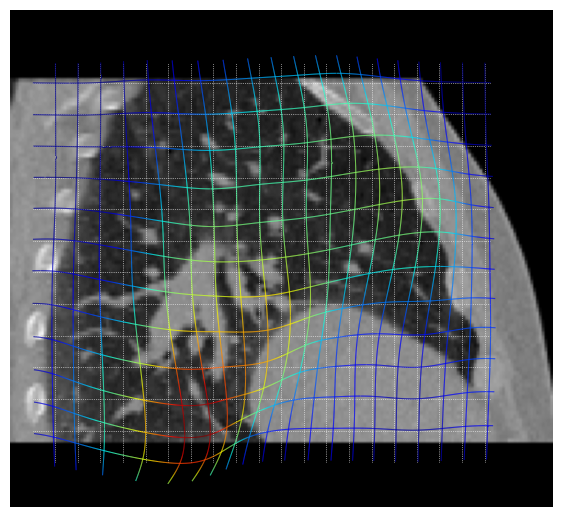

In [3]:
_ = plot_deformed_mesh(result, (slice(None), slice(None), 50), 8, fix_axes=True)